In [15]:
import matplotlib.pyplot as plt
import numpy as np
import csv 
from astropy import coordinates as coord
from astropy import units as u
import pandas as pd

In [7]:
GCnameGEMS = "Pal_5"
GCnameTstrippy = "Pal5"

In [14]:
path="../data-raw/actions-binaries-cleaned-20231012/"
fname = path + GCname + ".csv"
headers=["cluster","ra","dec","dist","pmra","pmdec","vlos","jr","jp","jz","x","y","z","vx","vy","vz","vr","mb1","mb2","vesc","R","r","e","E"]

In [18]:
# Read the CSV file
data = pd.read_csv(fname)

In [ ]:
data['ra'].to_numpy()


array([-0.59678881,  1.77955944, 14.01124032, ...,  3.55039692,
        9.54244357, -0.13395371], shape=(29332,))

In [37]:
# put in an astropy object
coords = coord.SkyCoord(ra=data['ra'].to_numpy()*u.deg, 
                        dec=data['dec'].to_numpy()*u.deg,
                        distance=data['dist'].to_numpy()*u.kpc,
                        pm_ra_cosdec=data['pmra'].to_numpy()*u.mas/u.yr,
                        pm_dec=data['pmdec'].to_numpy()*u.mas/u.yr,
                        radial_velocity=data['vlos'].to_numpy()*u.km/u.s)
# convert to galactic coordinates
coords_galactic = coords.galactic
# wrap at 180
coords_galactic.l.wrap_at(180*u.deg, inplace=True)

/var/folders/vt/72vlp8hj577dnzr1gl35j41c0000gn/T/ipykernel_66339/3166797525.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


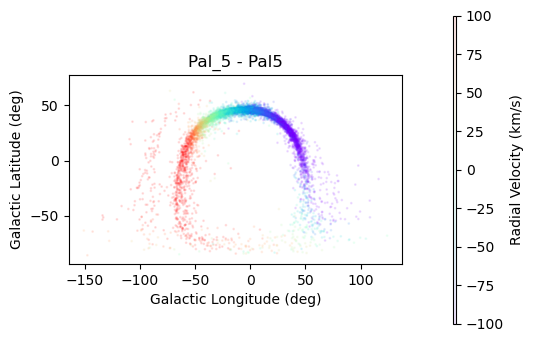

In [42]:
fig= plt.figure(figsize=(5, 4))
gs = plt.GridSpec(1, 2, figure=fig, wspace=0.3,width_ratios=[1, 1/100])
ax1 = fig.add_subplot(gs[0, 0])
cax2 = fig.add_subplot(gs[0, 1])
ax1.scatter(coords_galactic.l.wrap_at(180*u.deg).degree, coords_galactic.b.degree, 
            s=1, c=data['vlos'], cmap='rainbow', vmin=-100, vmax=100,alpha=0.1)

ax1.set_aspect('equal', adjustable='box')
ax1.set_xlabel('Galactic Longitude (deg)')
ax1.set_ylabel('Galactic Latitude (deg)')
ax1.set_title(GCnameGEMS + " - " + GCnameTstrippy)
cbar = plt.colorbar(ax1.collections[0], cax=cax2, orientation='vertical')
cbar.set_label('Radial Velocity (km/s)')
plt.tight_layout()
